
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        # compute mean and std for each feature (column-wise)
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

        # avoid division by zero
        self.std_[self.std_ == 0] = 1.0

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)



In [ ]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initialize weights and bias
        self.W = np.zeros(n_features)
        self.b = 0.0

        self.loss_history = []

        for _ in range(self.epochs):
            # predictions
            y_pred = X @ self.W + self.b

            # mean squared error + L2 regularization
            loss = np.mean((y - y_pred) ** 2) + self.l2_lambda * np.sum(self.W ** 2)
            self.loss_history.append(loss)

            # gradients
            dW = (-2 / n_samples) * (X.T @ (y - y_pred)) + 2 * self.l2_lambda * self.W
            db = (-2 / n_samples) * np.sum(y - y_pred)

            # update
            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.W + self.b



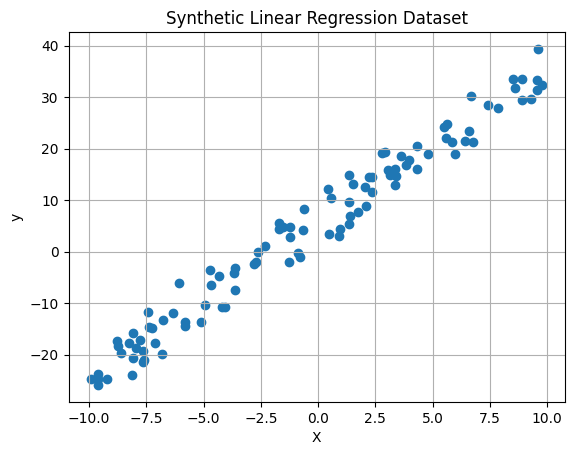

In [ ]:
np.random.seed(0)

n_samples = 100

# single feature
X = np.random.uniform(-10, 10, size=(n_samples, 1))

# true relationship: y = 3x + 5 + noise
noise = np.random.normal(0, 3, size=n_samples)
y = 3 * X[:, 0] + 5 + noise

# reshape y if needed
y = y.astype(np.float64)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Linear Regression Dataset")
plt.grid(True)
plt.show()


In [ ]:
# standardize features
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

# train model
model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

# predictions
y_pred = model.predict(X_scaled)


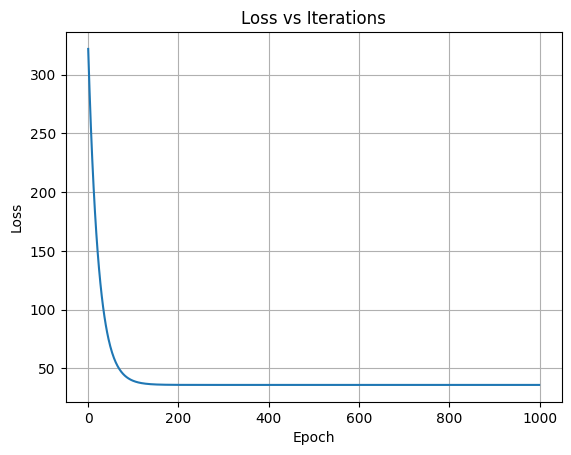

In [ ]:
plt.figure()
plt.plot(model.loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.grid(True)
plt.show()


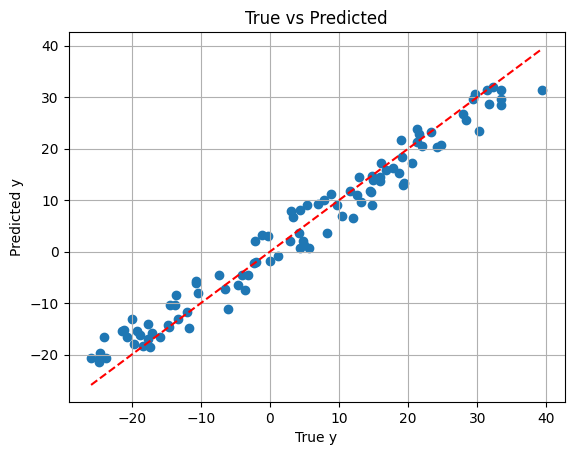

In [ ]:
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("True vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()

In [ ]:
# WITHOUT standardization
model_raw = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.0)
model_raw.fit(X, y)

# WITH standardization
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model_scaled = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.0)
model_scaled.fit(X_scaled, y)


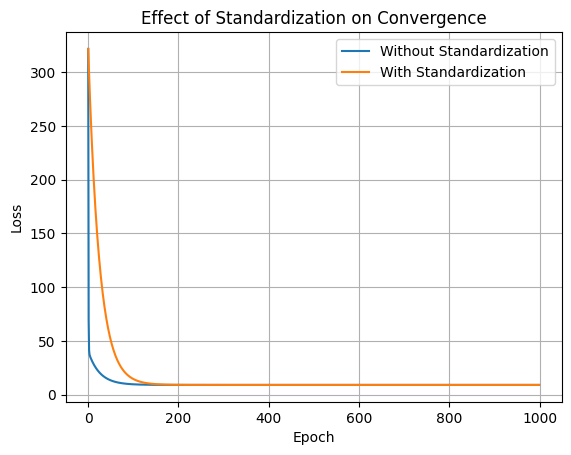

In [ ]:
plt.figure()
plt.plot(model_raw.loss_history, label="Without Standardization")
plt.plot(model_scaled.loss_history, label="With Standardization")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Effect of Standardization on Convergence")
plt.legend()
plt.grid(True)
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [ ]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [ ]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.W = np.zeros(n_features)
        self.b = 0.0
        self.loss_history = []

        for _ in range(self.epochs):
            z = X @ self.W + self.b
            y_pred = sigmoid(z)

            # Binary Cross Entropy + L2
            eps = 1e-9
            loss = -np.mean(
                y * np.log(y_pred + eps) +
                (1 - y) * np.log(1 - y_pred + eps)
            ) + self.l2_lambda * np.sum(self.W ** 2)

            self.loss_history.append(loss)

            # gradients
            dW = (1 / n_samples) * (X.T @ (y_pred - y)) + 2 * self.l2_lambda * self.W
            db = (1 / n_samples) * np.sum(y_pred - y)

            # update
            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict_proba(self, X):
        return sigmoid(X @ self.W + self.b)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)


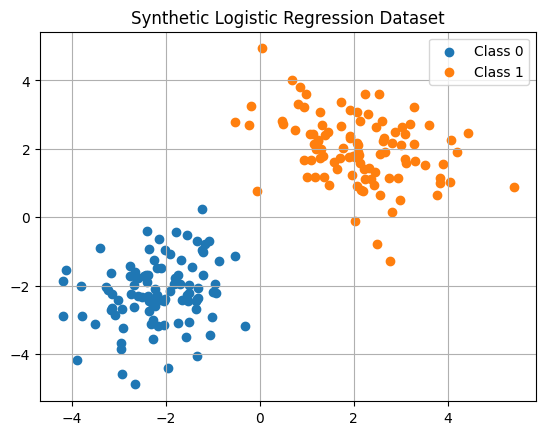

In [ ]:
np.random.seed(1)

n_samples = 200

# two clusters in 2D
X0 = np.random.multivariate_normal(mean=[-2, -2],
                                   cov=[[1, 0.3], [0.3, 1]],
                                   size=n_samples//2)

X1 = np.random.multivariate_normal(mean=[2, 2],
                                   cov=[[1, -0.3], [-0.3, 1]],
                                   size=n_samples//2)

X = np.vstack((X0, X1))
y = np.array([0]*(n_samples//2) + [1]*(n_samples//2))

plt.scatter(X0[:,0], X0[:,1], label="Class 0")
plt.scatter(X1[:,0], X1[:,1], label="Class 1")
plt.legend()
plt.title("Synthetic Logistic Regression Dataset")
plt.grid(True)
plt.show()


In [ ]:
# standardize features using your earlier scaler
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LogisticRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)


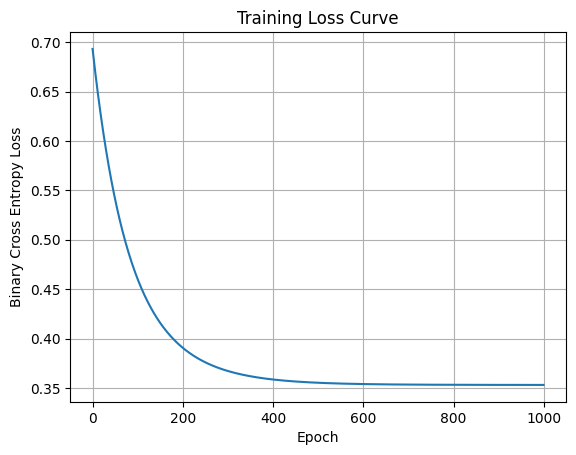

In [ ]:
plt.figure()
plt.plot(model.loss_history)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


In [ ]:
accuracy = np.mean(y_pred == y)
print("Final Training Accuracy:", accuracy)


Final Training Accuracy: 1.0



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [ ]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iter=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    M = np.array(M)
    n, m = M.shape

    # flatten values for easier centroid updates
    values = M.flatten()

    # initialize centroids randomly from matrix values
    centroids = np.random.choice(values, k, replace=False)

    assignment_table = np.zeros((n, m), dtype=int)

    for _ in range(max_iter):
        # --- Assignment step ---
        for i in range(n):
            for j in range(m):
                distances = np.abs(centroids - M[i, j])
                assignment_table[i, j] = np.argmin(distances)

        # --- Update step ---
        new_centroids = np.zeros_like(centroids)

        for cluster_id in range(k):
            cluster_values = values[assignment_table.flatten() == cluster_id]

            if len(cluster_values) > 0:
                new_centroids[cluster_id] = np.mean(cluster_values)
            else:
                # reinitialize empty cluster
                new_centroids[cluster_id] = np.random.choice(values)

        # check convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    # --- Build cookbook ---
    cookbook = {i: [] for i in range(k)}
    for i in range(n):
        for j in range(m):
            cluster_id = assignment_table[i, j]
            cookbook[cluster_id].append((i, j))

    return assignment_table, cookbook, centroids



In [ ]:
n_rows, n_cols = 10, 10
M = np.random.rand(n_rows, n_cols) * 100  # Random matrix with values between 0 and 100
k = 3  # Number of clusters

assignment_table, cookbook, centroids = kmeans_matrix(M, k)

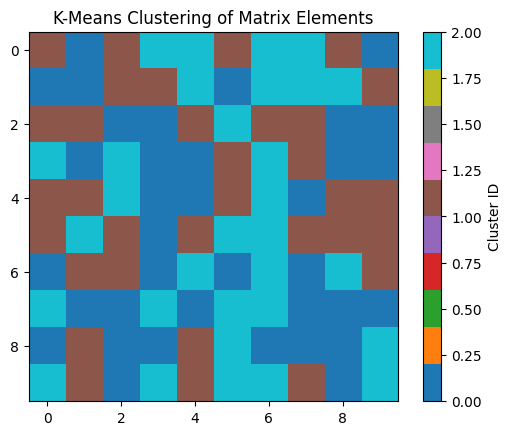

In [ ]:
plt.figure()
plt.imshow(assignment_table, cmap='tab10')
plt.colorbar(label="Cluster ID")
plt.title("K-Means Clustering of Matrix Elements")
plt.show()

Now that `assignment_table`, `cookbook`, and `centroids` are generated, you can proceed with plotting the `assignment_table`.


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
